In [1]:
import os
import pycocotools
from pycocotools import mask
import pycocotools.mask as mask_util
import numpy as np
import json
from pycocotools.coco import COCO
from sklearn.model_selection import train_test_split
import random 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import matplotlib as mpl

def np_encoder(object):
    if isinstance(object, np.generic):
        return object.item()

In [2]:
os.getcwd()

'/Users/srikaranreddy/Desktop/Spring Semester/Computer Vision 6.8300/cv-project/gi-tract-image-segmentation/notebooks'

In [3]:
os.chdir('/Users/srikaranreddy/Desktop/Spring Semester/Computer Vision 6.8300/cv-project/gi-tract-image-segmentation')

In [4]:
from src.data import SegmentationDataset

In [5]:
sd = SegmentationDataset(dataset_dir='datasets/train', 
                         csv_file_path='datasets/train.csv')

In [6]:
sd.processed_df.shape

(33913, 12)

In [7]:
df = sd.processed_df

In [8]:
random.seed(42)

train_df, temp_df = train_test_split(df, test_size=0.35, random_state=42)
# Split the temporary dataset into validation and test sets
val_df, test_df = train_test_split(temp_df, test_size=0.5714, random_state=42)  # test_size ~ 57.14% of 35%


train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [9]:
train_df['class'].value_counts(normalize=True)

class
large_bowel    0.412603
small_bowel    0.330354
stomach        0.257043
Name: proportion, dtype: float64

In [10]:
val_df['class'].value_counts(normalize=True)

class
large_bowel    0.415176
small_bowel    0.330057
stomach        0.254767
Name: proportion, dtype: float64

In [11]:
test_df['class'].value_counts(normalize=True)

class
large_bowel    0.424296
small_bowel    0.330237
stomach        0.245467
Name: proportion, dtype: float64

### Testing the code for temporary dataframe with 20 samples

In [12]:
temp_df = train_df.sample(8)
temp_df = temp_df.reset_index(drop=True)

In [13]:
CLASSES = ['small_bowel', 'large_bowel', 'stomach']
categories = sd.create_coco_categories(CLASSES)
categories

[{'id': 0, 'name': 'small_bowel'},
 {'id': 1, 'name': 'large_bowel'},
 {'id': 2, 'name': 'stomach'}]

In [14]:
temp_images = sd.create_coco_images(temp_df)
temp_images[0]

Processing images: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 12065.60it/s]


{'id': 1,
 'file_name': 'case147/case147_day19/scans/slice_0077_266_266_1.50_1.50.png',
 'width': 266,
 'height': 266}

In [15]:
temp_annotations = sd.create_annotations(temp_df, temp_images)
temp_annotations[0]

Generating annotations: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 64.10it/s]


{'segmentation': {'counts': [57583,
   4,
   260,
   9,
   257,
   12,
   253,
   15,
   251,
   16,
   250,
   17,
   250,
   17,
   250,
   17,
   250,
   16,
   251,
   15,
   252,
   14,
   253,
   13,
   254,
   12,
   255,
   10,
   258,
   7,
   9435],
  'size': [266, 266]},
 'bbox': [216, 124, 15, 19],
 'area': 49470,
 'image_id': 1,
 'category_id': 1,
 'iscrowd': 0,
 'id': 0}

In [16]:
temp_json = {
    'categories': categories,
    'images': temp_images,
    'annotations': temp_annotations
}

with open('temp_json.json', 'w', encoding='utf-8') as f:
    json.dump(temp_json, f, ensure_ascii=True, indent=4, default=np_encoder)

In [17]:
from pathlib import Path
annFile = Path(f'temp_json.json')
coco = COCO(annFile)
imgIds = coco.getImgIds()

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [18]:
imgs = coco.loadImgs(imgIds)
imgs

[{'id': 1,
  'file_name': 'case147/case147_day19/scans/slice_0077_266_266_1.50_1.50.png',
  'width': 266,
  'height': 266},
 {'id': 2,
  'file_name': 'case29/case29_day13/scans/slice_0081_266_266_1.50_1.50.png',
  'width': 266,
  'height': 266},
 {'id': 3,
  'file_name': 'case133/case133_day23/scans/slice_0074_360_310_1.50_1.50.png',
  'width': 360,
  'height': 310},
 {'id': 4,
  'file_name': 'case149/case149_day12/scans/slice_0106_266_266_1.50_1.50.png',
  'width': 266,
  'height': 266},
 {'id': 5,
  'file_name': 'case2/case2_day5/scans/slice_0074_266_266_1.50_1.50.png',
  'width': 266,
  'height': 266},
 {'id': 6,
  'file_name': 'case65/case65_day28/scans/slice_0104_266_266_1.50_1.50.png',
  'width': 266,
  'height': 266},
 {'id': 7,
  'file_name': 'case44/case44_day19/scans/slice_0089_266_266_1.50_1.50.png',
  'width': 266,
  'height': 266},
 {'id': 8,
  'file_name': 'case116/case116_day0/scans/slice_0056_360_310_1.50_1.50.png',
  'width': 360,
  'height': 310}]

In [19]:
dataset_dir = '/Users/srikaranreddy/Desktop/Spring Semester/Computer Vision 6.8300/cv-project/gi-tract-image-segmentation/datasets/train'

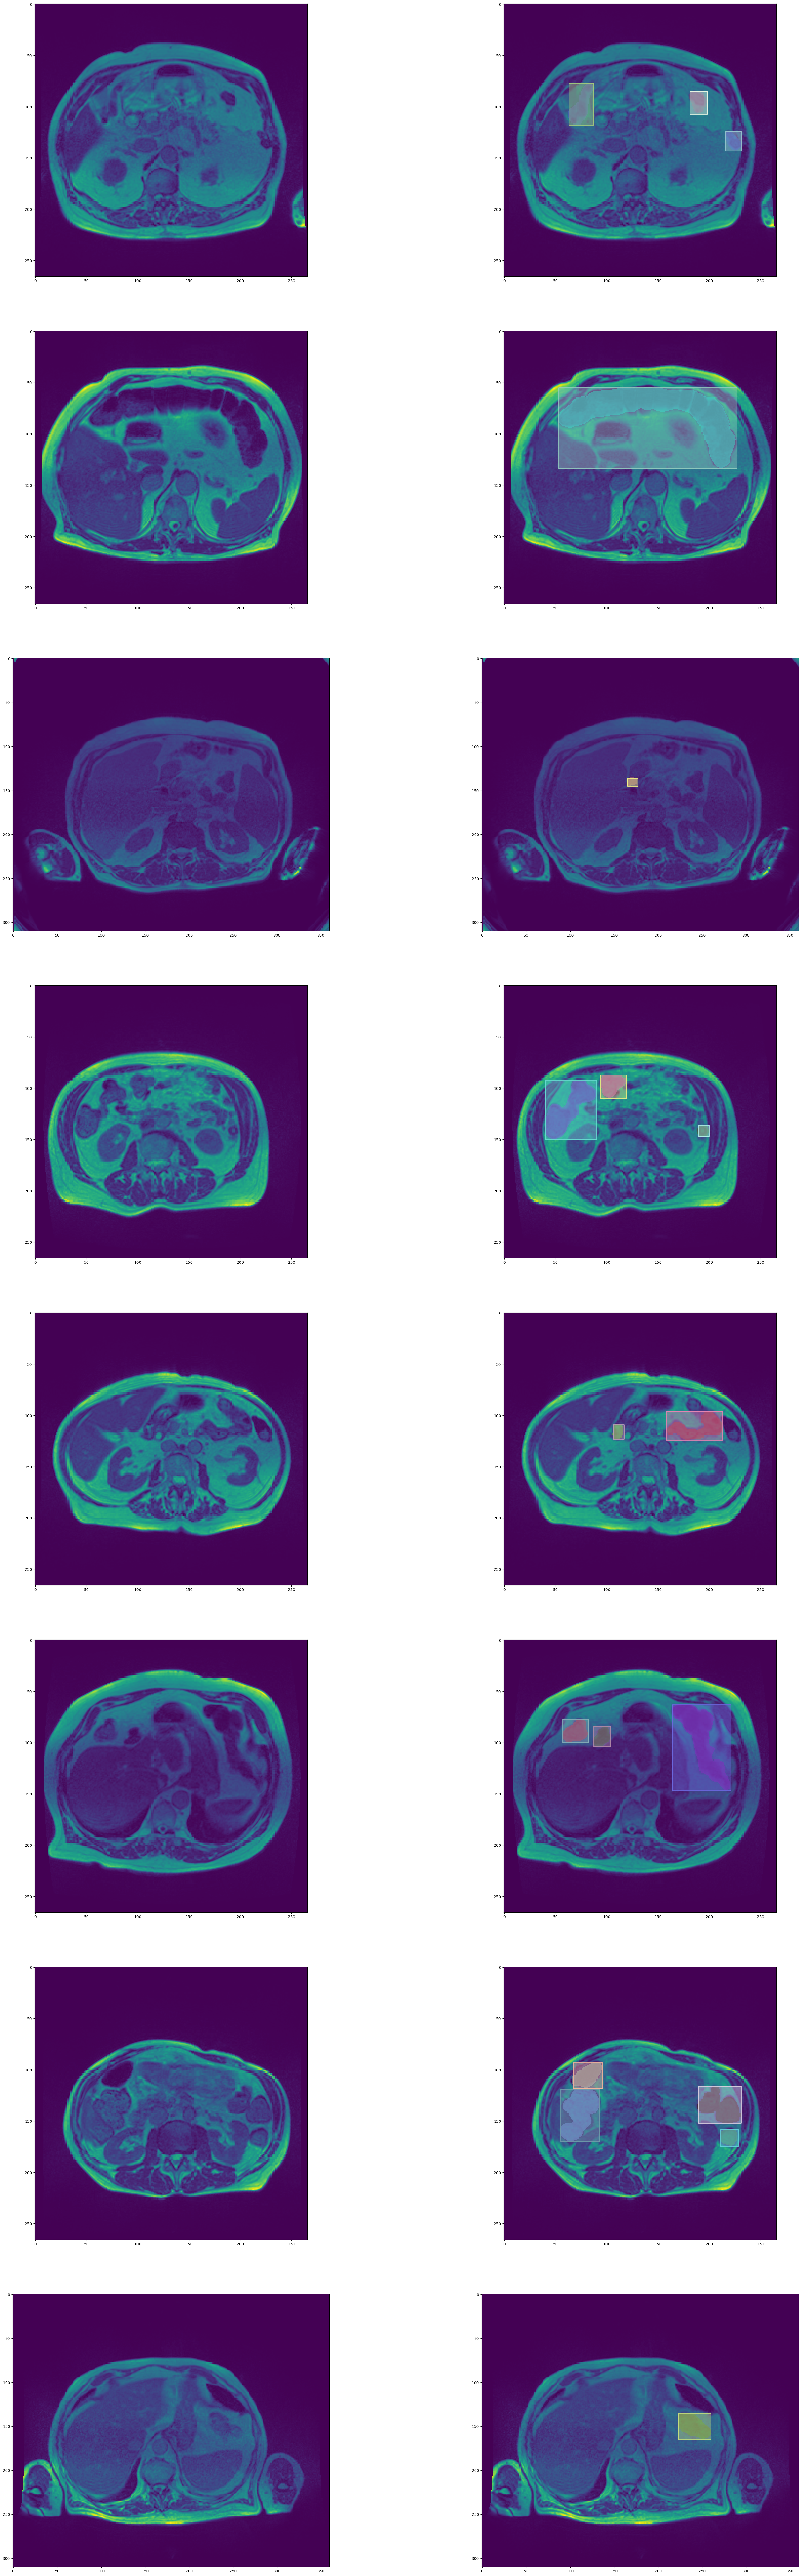

In [20]:
from matplotlib import pyplot as plt
from PIL import Image
imgs = coco.loadImgs(imgIds)
_, axs = plt.subplots(len(imgs), 2, figsize=(40, 15 * len(imgs)))
for img, ax in zip(imgs, axs):
    I = Image.fromarray(
        np.array(Image.open(os.path.join(dataset_dir, img['file_name']))).astype("uint16"))
    annIds = coco.getAnnIds(imgIds=[img['id']])
    anns = coco.loadAnns(annIds)
    ax[0].imshow(I)
    ax[1].imshow(I)
    plt.sca(ax[1])
    coco.showAnns(anns, draw_bbox=True)

In [22]:
from src.data import DataGenerator

In [23]:
temp_generator_class = DataGenerator(dataset_dir='datasets/train',
                                     subset="train",
                                     classes=CLASSES,
                                     input_image_size=(128,128),
                                     annFile='temp_json.json',
                                     shuffle=True)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [24]:
X, y = temp_generator_class.__getitem__(0)

In [25]:
X.shape, y.shape

((128, 128, 3), (128, 128, 3))

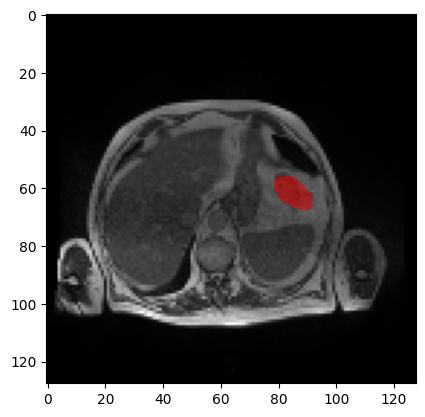

In [50]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['none', 'red'])  # 'none' is transparent, 'red' for the mask

fig, ax = plt.subplots()
# Display the image
ax.imshow((X/255.)[:,:,0], cmap='gray')  # Use gray scale for the background image
# Display the mask
# The mask is added with 'alpha' for transparency so the image can be seen under the mask
ax.imshow(y[:,:,1], cmap=cmap, alpha=0.5)  # Adjust alpha for more or less transparency

plt.show()

In [54]:
from torch.utils.data import DataLoader

temp_loader = DataLoader(temp_generator_class, batch_size=32, num_workers=0)

In [55]:
print("Batch size:", temp_loader.batch_size)
print("Num workers:", temp_loader.num_workers)
print("Dataset size:", len(temp_loader.dataset))
print("Number of batches:", len(temp_loader))

Batch size: 32
Num workers: 0
Dataset size: 8
Number of batches: 1


In [56]:
for images, labels in temp_loader:
    # Execute your training or evaluation process
    print(images)
    pass

tensor([[[[0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000]],

         ...,

         [[0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000],
          [0.0000

### Testing successful, proceeding to a train and test dataframes

In [57]:
os.getcwd()

'/Users/srikaranreddy/Desktop/Spring Semester/Computer Vision 6.8300/cv-project/gi-tract-image-segmentation'

In [14]:
CLASSES = ['small_bowel', 'large_bowel', 'stomach']
categories = sd.create_coco_categories(CLASSES)
train_images = sd.create_coco_images(train_df)
train_annotations = sd.create_annotations(train_df, train_images)

train_json = {
    'categories': categories,
    'images': train_images,
    'annotations': train_annotations
}

with open('datasets/coco/train_json.json', 'w', encoding='utf-8') as f:
    json.dump(train_json, f, ensure_ascii=True, indent=4, default=np_encoder)
    
print(train_annotations[0])

Generating annotations: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 14269/14269 [06:04<00:00, 39.19it/s]


{'segmentation': {'counts': [50081, 10, 298, 14, 295, 16, 294, 17, 293, 17, 293, 17, 293, 17, 293, 17, 293, 17, 293, 17, 293, 17, 293, 17, 294, 16, 294, 15, 296, 14, 296, 13, 298, 11, 301, 7, 56240], 'size': [310, 360]}, 'bbox': [161, 168, 18, 17], 'area': 68595, 'image_id': 1, 'category_id': 2, 'iscrowd': 0, 'id': 0}


In [15]:
CLASSES = ['small_bowel', 'large_bowel', 'stomach']
categories = sd.create_coco_categories(CLASSES)
val_images = sd.create_coco_images(val_df)
val_annotations = sd.create_annotations(val_df, val_images)

val_json = {
    'categories': categories,
    'images': val_images,
    'annotations': val_annotations
}

with open('datasets/coco/val_json.json', 'w', encoding='utf-8') as f:
    json.dump(val_json, f, ensure_ascii=True, indent=4, default=np_encoder)
    
print(val_annotations[0])

Generating annotations: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 4620/4620 [01:22<00:00, 55.86it/s]


{'segmentation': {'counts': [55168, 1, 1, 1, 261, 7, 258, 9, 256, 13, 253, 16, 250, 17, 250, 18, 249, 19, 248, 19, 250, 18, 249, 18, 250, 17, 250, 19, 248, 20, 247, 20, 247, 21, 247, 22, 245, 23, 243, 24, 243, 23, 245, 21, 246, 20, 248, 18, 249, 17, 252, 13, 254, 11, 8904], 'size': [266, 266]}, 'bbox': [207, 102, 26, 40], 'area': 113475, 'image_id': 1, 'category_id': 1, 'iscrowd': 0, 'id': 0}


In [16]:
test_images = sd.create_coco_images(test_df)
test_annotations = sd.create_annotations(test_df, test_images)
test_json = {
    'categories': categories,
    'images': test_images,
    'annotations': test_annotations
}

with open('datasets/coco/test_json.json', 'w', encoding='utf-8') as f:
    json.dump(test_json, f, ensure_ascii=True, indent=4, default=np_encoder)

print(test_annotations[0])

Generating annotations: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5984/5984 [01:51<00:00, 53.89it/s]


{'segmentation': {'counts': [41893, 4, 261, 6, 259, 8, 257, 8, 258, 8, 258, 7, 259, 6, 260, 6, 260, 5, 262, 4, 262, 3, 26202], 'size': [266, 266]}, 'bbox': [157, 128, 11, 9], 'area': 16575, 'image_id': 1, 'category_id': 0, 'iscrowd': 0, 'id': 0}


In [58]:
train_df.shape, val_df.shape, test_df.shape

((22043, 12), (5087, 12), (6783, 12))

In [59]:
from src.data import DataGenerator

In [62]:
train_generator_class = DataGenerator(dataset_dir='datasets/train',
                                     subset="train",
                                     classes=CLASSES,
                                     input_image_size=(128,128),
                                     annFile='datasets/coco/train_json.json',
                                     shuffle=True)

val_generator_class = DataGenerator(dataset_dir='datasets/train',
                                     subset="train",
                                     classes=CLASSES,
                                     input_image_size=(128,128),
                                     annFile='datasets/coco/val_json.json',
                                     shuffle=True)

test_generator_class = DataGenerator(dataset_dir='datasets/train',
                                     subset="test",
                                     classes=CLASSES,
                                     input_image_size=(128,128),
                                     annFile='datasets/coco/test_json.json',
                                     shuffle=False)

loading annotations into memory...
Done (t=0.77s)
creating index...
index created!
loading annotations into memory...
Done (t=0.32s)
creating index...
index created!
loading annotations into memory...
Done (t=0.17s)
creating index...
index created!


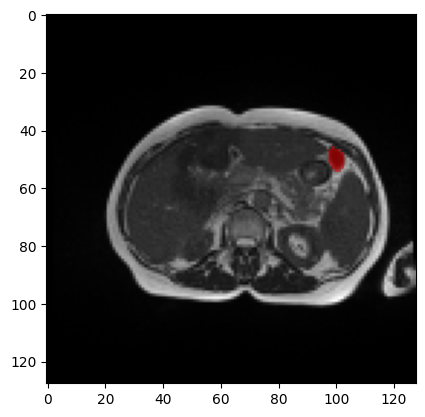

In [73]:
from matplotlib.colors import ListedColormap

X, y = train_generator_class.__getitem__(9)

cmap = ListedColormap(['none', 'red'])  # 'none' is transparent, 'red' for the mask

fig, ax = plt.subplots()
# Display the image
ax.imshow((X/255.)[:,:,0], cmap='gray')  # Use gray scale for the background image
# Display the mask
# The mask is added with 'alpha' for transparency so the image can be seen under the mask
ax.imshow(y[:,:,1], cmap=cmap, alpha=0.5)  # Adjust alpha for more or less transparency

plt.show()

In [74]:
train_loader = DataLoader(train_generator_class, batch_size=32, num_workers=0)
val_loader = DataLoader(val_generator_class, batch_size=32, num_workers=0)
test_loader = DataLoader(test_generator_class, batch_size=32, num_workers=0)

In [75]:
print("Batch size:", train_loader.batch_size)
print("Num workers:", train_loader.num_workers)
print("Dataset size:", len(train_loader.dataset))
print("Number of batches:", len(train_loader))

Batch size: 32
Num workers: 0
Dataset size: 14269
Number of batches: 446


In [76]:
print("Batch size:", val_loader.batch_size)
print("Num workers:", val_loader.num_workers)
print("Dataset size:", len(val_loader.dataset))
print("Number of batches:", len(val_loader))

Batch size: 32
Num workers: 0
Dataset size: 4620
Number of batches: 145


In [79]:
import segmentation_models_pytorch as smp

# Define model
model = smp.Unet(
    encoder_name="efficientnet-b7", 
    encoder_weights="imagenet", 
    in_channels=3, 
    classes=3,
    activation='sigmoid'
)

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b7-dcc49843.pth" to /Users/srikaranreddy/.cache/torch/hub/checkpoints/efficientnet-b7-dcc49843.pth
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 254M/254M [00:30<00:00, 8.73MB/s]


In [80]:
model

Unet(
  (encoder): EfficientNetEncoder(
    (_conv_stem): Conv2dStaticSamePadding(
      3, 64, kernel_size=(3, 3), stride=(2, 2), bias=False
      (static_padding): ZeroPad2d((0, 1, 0, 1))
    )
    (_bn0): BatchNorm2d(64, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (_blocks): ModuleList(
      (0): MBConvBlock(
        (_depthwise_conv): Conv2dStaticSamePadding(
          64, 64, kernel_size=(3, 3), stride=[1, 1], groups=64, bias=False
          (static_padding): ZeroPad2d((1, 1, 1, 1))
        )
        (_bn1): BatchNorm2d(64, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
        (_se_reduce): Conv2dStaticSamePadding(
          64, 16, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_se_expand): Conv2dStaticSamePadding(
          16, 64, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_project_conv): Conv2dStaticSamePaddi

In [ ]:
import os
import pandas as pd
import numpy as np
import itertools
import cv2
from glob import glob
from torch.utils.data import Dataset, DataLoader
from pycocotools.coco import COCO
from tqdm import tqdm
import warnings
warnings.simplefilter(action='ignore')

from .utils.data_utils import get_scan_file_path, decode_rle, convert_binary_mask_to_rle
# from ..config import BASE_PATH, CLASSES


BASE_PATH = '../../gi-tract-image-segmentation'
CLASSES = ['small_bowel', 'large_bowel', 'stomach']
IMAGE_SIZE = (128, 128)


class SegmentationDataset():
    def __init__(self, dataset_dir, csv_file_path):
        self.dataset_dir = dataset_dir
        self.train_csv = pd.read_csv(csv_file_path)
        self.processed_df = self.preprocess(self.train_csv)
        # self.categories = self.create_coco_categories(CLASSES)
        # self.images = self.create_coco_images(self.processed_df)
        # self.annotations = self.create_annotations(self.processed_df, self.images)


    def preprocess(self, df):

        df['case'] = df['id'].apply(lambda id_str: id_str.split('_')[0][4:])
        df['day'] = df['id'].apply(lambda id_str: id_str.split('_')[1][3:])
        df['slice'] = df['id'].apply(lambda id_str: id_str.split('_')[-1])
        df['file_path'] = df['id'].apply(lambda id_str: get_scan_file_path(self.dataset_dir, id_str))

        df['file_name'] = df['file_path'].apply(lambda path: os.path.basename(path))
        df['composite_id'] = df.apply(lambda row: f"{row['case']}_{row['day']}_{row['file_name']}", axis=1)

        df['image_height'] = df['file_name'].apply(lambda name: int(name.split('_')[2]))
        df['image_width'] = df['file_name'].apply(lambda name: int(name.split('_')[3]))
        df['resolution'] = df.apply(lambda row: f"{row['image_height']}x{row['image_width']}", axis=1)

        masked_df = df[df['segmentation'].notnull()]
        masked_df["segmentation"] = masked_df["segmentation"].astype("str")
        masked_df = masked_df.reset_index(drop=True)

        return masked_df

    def create_coco_categories(self, classes):
        """ Create categories section for COCO JSON. """
        categories = [{"id": idx, "name": cls} for idx, cls in enumerate(classes)]
        return categories

    def create_coco_images(self, df):
        images = []
        filepaths = df.file_path.unique().tolist()

        for i, filepath in enumerate(tqdm(filepaths, desc="Processing images")):
            file_name = '/'.join(filepath.split("/")[2:])
            height = int(filepath.split("/")[-1].split("_")[3])
            width = int(filepath.split("/")[-1].split("_")[2])
            images.append({
                "id": i + 1,
                "file_name": file_name,
                "width": width,
                "height": height
            })
        return images

    def create_annotations(self, df, images):
        annotations = []
        count = 0 

        for image in tqdm(images, desc='Generating annotations'):
            image_id = image['id']
            filepath = image['file_name']
            file_id = ('_'.join(
                (filepath.split("/")[-3] + "_" + filepath.split("/")[-1]).split("_")[:-4]))
            height_slice = int(filepath.split("/")[-1].split("_")[3])
            width_slice = int(filepath.split("/")[-1].split("_")[2])
        
            ids = df.index[df['id'] == file_id].tolist()
            if len(ids) > 0:
                for idx in ids:
                    segmentation_mask = decode_rle(
                        df.iloc[idx]['segmentation'], (height_slice, width_slice))
                    for contour in cv2.findContours(segmentation_mask, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)[0]:
                        mask_image = np.zeros(segmentation_mask.shape, dtype=np.uint8)
                        cv2.drawContours(mask_image, [contour], -1, 255, -1)
                        encoded_segmentation = convert_binary_mask_to_rle(mask_image)
                        ys, xs = np.where(mask_image)
                        x1, y1, x2, y2 = min(xs), min(ys), max(xs), max(ys)
                        annotations.append({
                            'segmentation': encoded_segmentation,
                            'bbox': [x1, y1, x2 - x1 + 1, y2 - y1 + 1],  # (x, y, w, h) format
                            'area': mask_image.sum(),
                            'image_id': image_id,
                            'category_id': CLASSES.index(df.iloc[idx]['class']),
                            'iscrowd': 0,
                            'id': count
                        })
                        count += 1
        return annotations

    
class DataGenerator(Dataset):
    def __init__(self, dataset_dir, subset, classes, 
                 input_image_size, annFile, shuffle=False, transform=None):
        self.dataset_dir = dataset_dir
        self.subset = subset
        self.classes= classes
        self.coco = COCO(annFile)
        self.catIds = self.coco.getCatIds(catNms=self.classes)
        self.cats = self.coco.loadCats(self.catIds)
        self.imgIds = self.coco.getImgIds()
        self.image_list = self.coco.loadImgs(self.imgIds)
        self.indexes = np.arange(len(self.image_list))
        self.input_image_size= (input_image_size)
        self.dataset_size = len(self.image_list)
        self.transform = transform
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
      return int(len(self.image_list))

    def on_epoch_end(self):
        if self.shuffle == True:
            np.random.shuffle(self.indexes)      

    def get_class_name(self, class_id, cats):
        for i in range(len(cats)):
            if cats[i]['id'] == class_id:
                return cats[i]['name']
        return None
  
    def get_normal_mask(self, image_id, catIds):
        annIds = self.coco.getAnnIds(image_id, catIds=catIds, iscrowd=None)
        anns = self.coco.loadAnns(annIds)
        cats = self.coco.loadCats(catIds)
        train_mask = np.zeros(self.input_image_size, dtype=np.uint8)
        for a in range(len(anns)):
            className = self.get_class_name(anns[a]['category_id'], cats)
            pixel_value = self.classes.index(className)+1
            new_mask = cv2.resize(self.coco.annToMask(anns[a])*pixel_value, self.input_image_size)
            train_mask = np.maximum(new_mask, train_mask)
        return train_mask          
        

    def get_levels_mask(self, image_id):
      #for each category , we get the x mask and add it to mask list
      masks = []  
      mask = np.zeros((self.input_image_size))
      for catId in self.catIds:
        mask = self.get_normal_mask(image_id, catId)
        masks.append(mask)
      return masks       

    def get_image(self, file_path):
        train_img = cv2.imread(os.path.join(self.dataset_dir, file_path), cv2.IMREAD_ANYDEPTH)
        train_img = cv2.resize(train_img, (self.input_image_size))
        train_img = train_img.astype(np.float32) / 255.
        if (len(train_img.shape)==3 and train_img.shape[2]==3): 
            return train_img
        else: 
            stacked_img = np.stack((train_img,)*3, axis=-1)
            return stacked_img          
    
    def __getitem__(self, index):
        
        X = np.empty((128, 128, 3))
        y = np.empty((128, 128, 3))

        img_info = self.image_list[index]
        X = self.get_image(img_info['file_name'])
        if self.transform:
            X = self.transform(X)
            
        mask_train = self.get_levels_mask(img_info['id'])

        for j in self.catIds:
            if self.transform:
                y[:, :, j] = self.transform(mask_train[j])
            else:
                y[:, :, j] = mask_train[j]

        X = np.array(X)
        y = np.array(y)

        if self.subset == 'train':
            return X, y
        else: 
            return X


        

from torch.nn import BCEWithLogitsLoss

class BCEDiceLoss(nn.Module):
    def __init__(self):
        super(BCEDiceLoss, self).__init__()
        self.bce = BCEWithLogitsLoss()
    
    def forward(self, y_pred, y_true):
        dice_loss = 1 - (2 * (y_pred * y_true).sum() + 1) / ((y_pred + y_true).sum() + 1)
        bce_loss = self.bce(y_pred, y_true)
        return 0.5 * dice_loss + 0.5 * bce_loss

def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = y_true.view(-1)
    y_pred_f = y_pred.view(-1)
    intersection = (y_true_f * y_pred_f).sum()
    return (2. * intersection + smooth) / (y_true_f.sum() + y_pred_f.sum() + smooth)
